##Instalar libreria o paquetes

In [1]:
pip install bokeh

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importar librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode , median
from numpy import var


In [5]:
import os
import sys
import os
sys.path.append('/usr/local/lib/python3.8/site-packages')
os.environ["GMT_LIBRARY_PATH"]="/usr/local/lib"

In [6]:
!pip install geopandas

In [7]:
import geopandas as gpd
#from aves.data import eod

In [8]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (350 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 126455 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

##Importar conjunto de datos

In [9]:
Data_Suelos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos crudos/Edafologicos/Resultados_de_An_lisis_de_Laboratorio_Suelos_en_Colombia.csv', encoding='latin1')
TEMPERATURA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos crudos/Climaticos/Temperatura/Temperatura_M_nima_del_Aire.csv', encoding='latin1')
preci = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos crudos/Climaticos/Precipitación/Precipitaci_n.csv', encoding='latin1')

Edáfologicos : Caracteristicas del suelo

In [10]:
Data_Suelos=Data_Suelos.replace(to_replace=['BOGOTÁ, D.C.','QUINDIO','ANCUYÁ','ARMERO GUAYABAL','BOGOTÁ,  D.C.','CALARCA','CALARCÁ','CUASPÚD','CÚCUTA','EL CARMEN DE CHUCURÍ','EL PIÑON','GUAPÍ','GÜICÁN','MOMPÓS','PIENDAMÓ','SAN LUIS DE CUBARRAL','SOTARA','TOLÚ VIEJO'], value=['BOGOTÁ. D.C.','QUINDÍO','ANCUYA','ARMERO','BOGOTÁ. D.C.','CALARCÁ','CALDAS','CUASPUD CARLOSAMA','CUCUTILLA','EL CARMEN DE CHUCURI','EL PIÑÓN','GUAPI','GÜICÁN DE LA SIERRA','SANTA CRUZ DE MOMPOX','PIENDAMÓ - TUNÍA','SAN JUAN NEPOMUCENO','SOTARÁ PAISPAMBA','SAN JOSÉ DE TOLUVIEJO'], regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r'<', value='', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r',', value='.', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace='4..01', value=4.01, regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r'>', value='', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace='ERROR: #N/A', value='', regex=True)

Climáticos :
 Precipitación
 Temperatura

In [11]:
#Temperatura: Filtrado y agrupación
#TEMPERATURA = TEMPERATURA[TEMPERATURA['ValorObservado'] != 0]
#TEMPERATURA.groupby(['Departamento','Municipio'])['ValorObservado'].agg(temp_min = 'min' , temp_max = 'max', temp_pro = 'mean')

In [12]:
#preci = preci[preci['ValorObservado'] != 0]
#preci.groupby(['Departamento','Municipio'])['ValorObservado'].agg(prec_min = 'min' , prec_max = 'max', prec_pro = 'mean')

In [13]:
#Exportar e importar datos limpios
TEMP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos procesados/Temperatura_sin_o.csv' ,encoding= 'unicode_escape')
PREC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos procesados/precipitacion.csv',encoding= 'unicode_escape')

##Análisis estadístico

Estadística descriptiva e inferencial

Variables continuas
 - Medidas centrales (media, moda , mediana)
 - Medidas de dispersión (rango varianza desviacion estandar precentiles)
 - Medidas de forma (histograma)

Variables nominales
 - Frecuencia relativa (probabilidad) , moda
 - Media y varianza de probabilidad estimada




#Precipitación

In [14]:
PREC

,Departamento,Municipio,prec_min,prec_max,prec_pro
0,AMAZONAS,LETICIA,0.01,16.25,0.386245
1,AMAZONAS,PUERTO NARIÑO,0.10,17.90,1.026376
2,ANTIOQUIA,ANGOSTURA,0.20,12.20,0.757503
3,ANTIOQUIA,BELLO,0.10,7.60,0.270588
4,ANTIOQUIA,CAREPA,0.20,16.60,1.407027
...,...,...,...,...,...
360,VALLE DEL CAUCA,RIOFRÍO,0.20,24.60,0.962186
361,VALLE DEL CAUCA,TRUJILLO,0.10,8.00,0.358142
362,VALLE DEL CAUCA,TULUÁ,0.20,4.80,0.400979
363,VAUPÉS,MITÚ,0.10,12.20,0.655747


In [15]:
# verificar si la variable es de tipo categorico o númerico segun sea su tipo de dato
PREC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  365 non-null    object 
 1   Municipio     365 non-null    object 
 2   prec_min      365 non-null    float64
 3   prec_max      365 non-null    float64
 4   prec_pro      365 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB


In [16]:
PREC.describe()

,prec_min,prec_max,prec_pro
count,365.000000,365.000000,365.000000
mean,0.138082,13.685877,0.731799
std,0.280220,7.664936,0.635820
min,0.001000,0.100000,0.100000
25%,0.100000,8.098000,0.386245
50%,0.100000,12.800000,0.562642
75%,0.200000,18.920000,0.948943
max,5.300000,30.000000,6.699967


In [17]:
print(mode(PREC.prec_max))
print(mode(PREC.prec_min))
print(mode(PREC.prec_pro))

print(median(PREC.prec_max))
print(median(PREC.prec_min))
print(median(PREC.prec_pro))

print(var(PREC.prec_max))
print(var(PREC.prec_min))
print(var(PREC.prec_pro))

9.6
0.1
0.1
12.8
0.1
0.562641899
58.59027912726588
0.07830811379245572
0.4031600120466072


Histogramas

In [18]:
plt.hist(preci.ValorObservado, color='#F2AB6D')
plt.title('Histograma de Precipitación')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Precipitacion/Histograma_Prec_total.jpg")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ValorObservado'

AttributeError: 'DataFrame' object has no attribute 'ValorObservado'

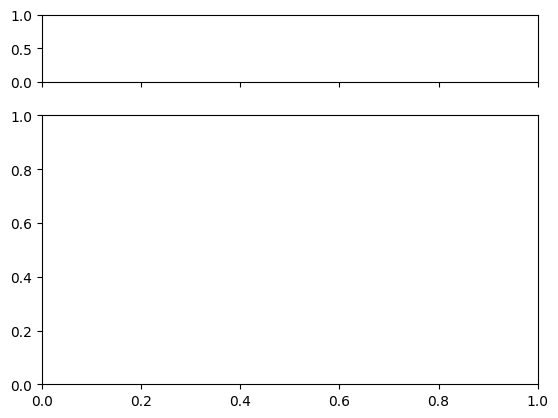

In [19]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(preci.ValorObservado, ax=ax[0] )
sns.distplot(preci.ValorObservado, ax=ax[1])
ax[1].axvline(np.mean(TEMPERATURA.ValorObservado), color='red')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Precipitacion/Histograma_Prec_total_caja.jpg")
plt.show()

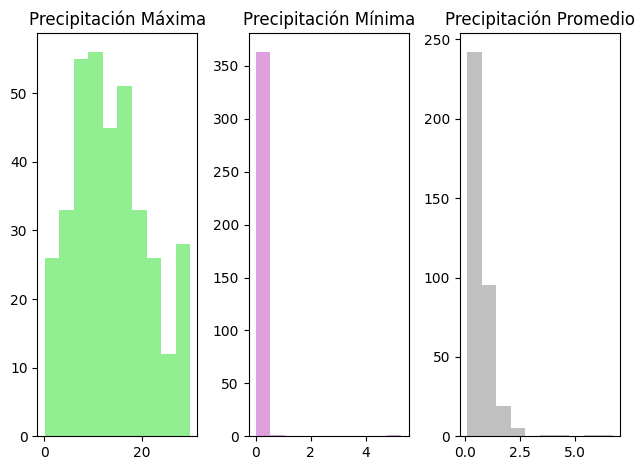

In [20]:
a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].hist(PREC.prec_max,color = '#90EE90')
ax[0].set_title('Precipitación Máxima')
ax[1].hist(PREC.prec_min,color = '#DDA0DD')
ax[1].set_title('Precipitación Mínima')
ax[2].hist(PREC.prec_pro,color = '#C0C0C0')
ax[2].set_title('Precipitación Promedio')
fig.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Precipitacion/Histograma_PREC.jpg")
plt.show()


Diagrama de caja y bogotes

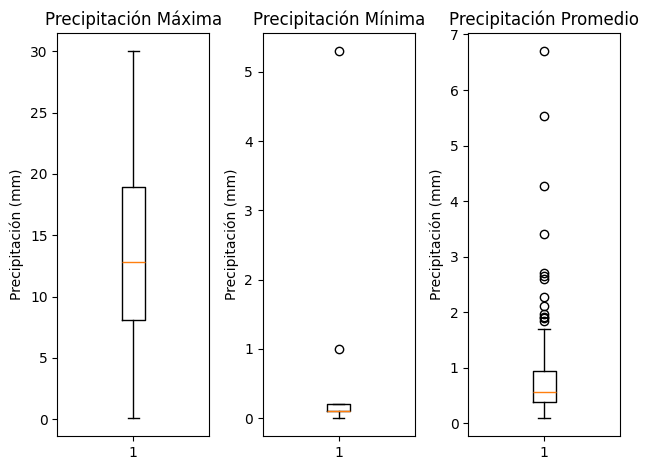

In [21]:
a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].boxplot([PREC.prec_max])
ax[0].set_title('Precipitación Máxima')
ax[0].set( ylabel='Precipitación (mm)')
ax[1].boxplot([PREC.prec_min])
ax[1].set_title('Precipitación Mínima')
ax[1].set( ylabel='Precipitación (mm)')
ax[2].boxplot([PREC.prec_pro])
ax[2].set_title('Precipitación Promedio')
ax[2].set( ylabel='Precipitación (mm)')
fig.tight_layout()

plt.show()

Diagramas de dispersión

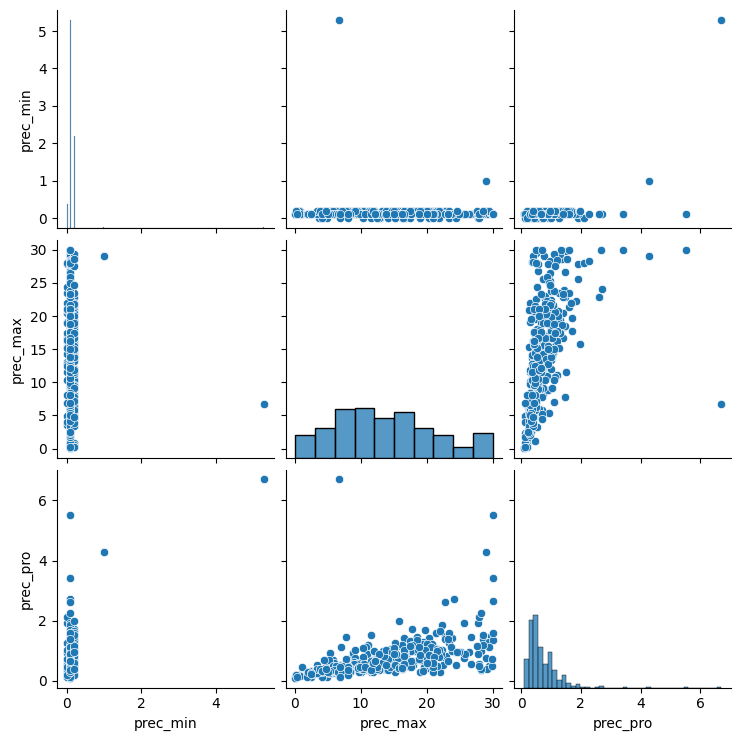

In [22]:
g1 = sns.pairplot(PREC)


In [23]:
#g1 = sns.pairplot(PREC, hue="Municipio")

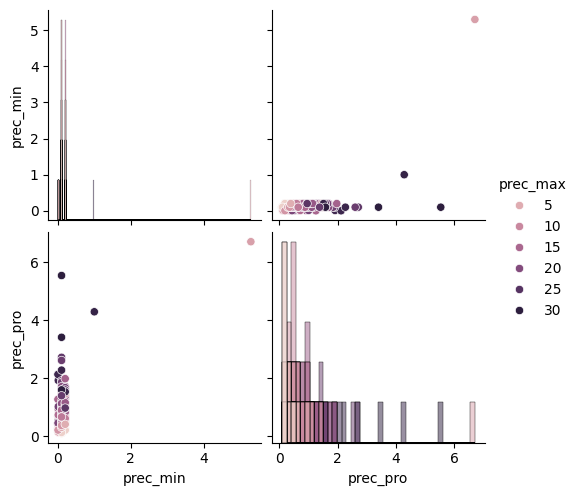

In [24]:
g2 = sns.pairplot(PREC, hue="prec_max",diag_kind="hist")

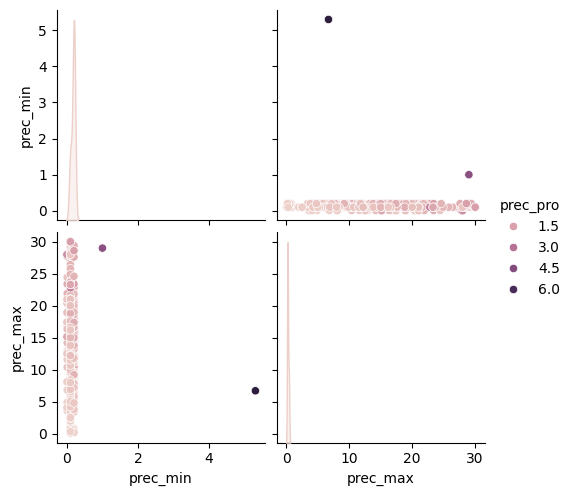

In [25]:
g3 = sns.pairplot(PREC, hue="prec_pro",diag_kind="auto")

#Temperatura

In [26]:
preci

,Departamento,Municipio,Precipitacion_min,Precipitacion_max,Precipitacion_prom
0,Nariño,Ipiales,850,1100,975
1,Cauca,Popayán,950,1300,1120
2,Tolima,Espinal,700,980,870
3,Meta,Villavicencio,1800,2500,2150
4,Antioquia,Medellín,1200,1500,1320
5,Huila,Neiva,700,1100,890
6,Santander,Bucaramanga,1300,1550,1420
7,Cundinamarca,Fusagasugá,1050,1350,1200


In [27]:
TEMP.describe()

,temp_min,temp_max,temp_pro
count,310.000000,310.000000,310.000000
mean,12.332992,30.260791,19.901739
std,7.119570,6.906613,6.083521
min,0.013699,8.100000,1.976779
25%,6.525000,26.100000,15.848036
50%,13.384265,30.809920,20.178652
75%,18.085683,34.575000,25.367911
max,27.700000,50.000000,37.882340


In [28]:
print("MODA")
print(mode(TEMP.temp_max))
print(mode(TEMP.temp_min))

print("MEDIANA")
print(median(TEMP.temp_max))
print(median(TEMP.temp_min))
print(median(TEMP.temp_pro))

print("VARIANZA")
print(var(TEMP.temp_max))
print(var(TEMP.temp_min))
print(var(TEMP.temp_pro))

MODA
26.1
0.1
MEDIANA
30.809919999999998
13.384265
20.17865202
VARIANZA
47.547426235509526
50.52476914468623
36.889846890398


In [29]:
from scipy import stats as s
print(int(s.mode(TEMP.temp_pro)[0]))

1


In [32]:
plt.hist(TEMPERATURA.ValorObservado, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Temperatura/Histograma_TEMP_T.jpg")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ValorObservado'

AttributeError: 'DataFrame' object has no attribute 'ValorObservado'

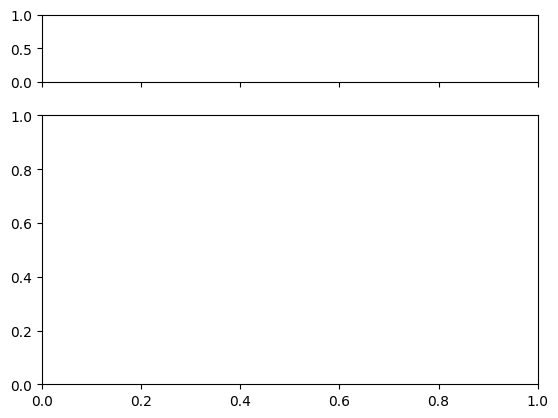

In [33]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(TEMPERATURA.ValorObservado, ax=ax[0])
sns.distplot(TEMPERATURA.ValorObservado, ax=ax[1])
ax[1].axvline(np.mean(TEMPERATURA.ValorObservado), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Temperatura/Histograma_TEMP_box.jpg")

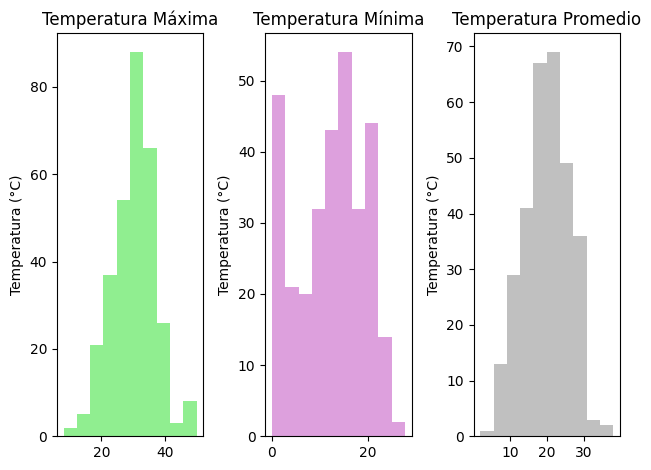

In [34]:
#Histigrama

a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].hist(TEMP.temp_max,color = '#90EE90')
ax[0].set_title('Temperatura Máxima')
ax[0].set( ylabel='Temperatura (°C)')
ax[1].hist(TEMP.temp_min,color = '#DDA0DD')
ax[1].set_title('Temperatura Mínima')
ax[1].set( ylabel='Temperatura (°C)')
ax[2].hist(TEMP.temp_pro,color = '#C0C0C0')
ax[2].set_title('Temperatura Promedio')
ax[2].set( ylabel='Temperatura (°C)')
fig.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Temperatura/Histograma_TEMP.jpg")
plt.show()

#ENA

In [36]:
ENA= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos crudos/Bioticos/Evaluaciones_Agropecuarias_Municipales_EVA.csv', encoding='latin1')

In [37]:
ENA.describe()

,Area_Sembrada_ha,Area_Cosechada_ha,Produccion_ton,Rendimiento_ton_ha
count,8.000000,8.000000,8.000000,8.000000
mean,615.000000,597.500000,2271.250000,3.700000
std,286.755247,274.837614,1350.464867,1.276155
min,350.000000,340.000000,750.000000,1.700000
25%,402.500000,392.500000,1330.000000,2.950000
50%,550.000000,535.000000,2150.000000,3.900000
75%,725.000000,712.500000,2950.000000,4.600000
max,1200.000000,1150.000000,4800.000000,5.300000


In [44]:
print(ENA.columns.tolist())
ENA.columns = ENA.columns.str.strip()
ENA = ENA[ENA['Area_Sembrada_ha'] != 0]

#ENA = ENA[ENA['Área Sembrada\n(ha)'] != 0]

['Departamento', 'Municipio', 'Cultivo', 'Area_Sembrada_ha', 'Area_Cosechada_ha', 'Produccion_ton', 'Rendimiento_ton_ha']


In [45]:
ENA.mode()

,Departamento,Municipio,Cultivo,Area_Sembrada_ha,Area_Cosechada_ha,Produccion_ton,Rendimiento_ton_ha
0,Antioquia,Bucaramanga,Algodón,350.0,340.0,750,1.7
1,Cauca,Espinal,Arroz,NaN,NaN,820,2.2
2,Cundinamarca,Fusagasugá,Banano,NaN,NaN,1500,3.2
3,Huila,Ipiales,Café,NaN,NaN,1800,3.6
4,Meta,Medellín,Maíz,NaN,NaN,2500,4.2
5,Nariño,Neiva,Plátano,NaN,NaN,2900,4.5
6,Santander,Popayán,Tomate,NaN,NaN,3100,4.9
7,Tolima,Villavicencio,Trigo,NaN,NaN,4800,5.3


In [47]:
ENA.median(numeric_only=True)

,0
Area_Sembrada_ha,550.0
Area_Cosechada_ha,535.0
Produccion_ton,2150.0
Rendimiento_ton_ha,3.9


In [48]:
ENA.var(numeric_only=True)

,0
Area_Sembrada_ha,8.222857e+04
Area_Cosechada_ha,7.553571e+04
Produccion_ton,1.823755e+06
Rendimiento_ton_ha,1.628571e+00


['Departamento', 'Municipio', 'Cultivo', 'Area_Sembrada_ha', 'Area_Cosechada_ha', 'Produccion_ton', 'Rendimiento_ton_ha']
['Departamento', 'Municipio', 'Cultivo', 'Area_Sembrada_ha', 'Area_Cosechada_ha', 'Produccion_ton', 'Rendimiento_ton_ha']


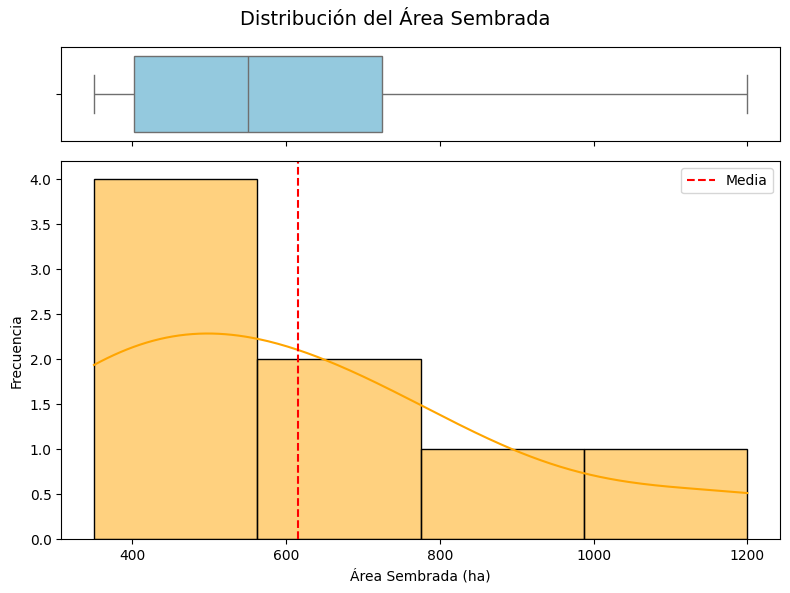

In [49]:
print(ENA.columns.tolist())
ENA.columns = ENA.columns.str.replace('\n', ' ').str.strip()
print(ENA.columns.tolist())

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico combinado: Boxplot (arriba) + Histograma con KDE (abajo)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=(8,6))

# Boxplot
sns.boxplot(x=ENA['Area_Sembrada_ha'], ax=ax[0], color='skyblue')

# Histograma con curva de densidad
sns.histplot(ENA['Area_Sembrada_ha'], ax=ax[1], kde=True, color='orange', edgecolor='black')

# Línea roja indicando la media
ax[1].axvline(np.mean(ENA['Area_Sembrada_ha']), color='red', linestyle='--', label='Media')

# Etiquetas y estilo
ax[1].legend()
ax[1].set_xlabel('Área Sembrada (ha)')
ax[1].set_ylabel('Frecuencia')
plt.suptitle('Distribución del Área Sembrada', fontsize=14)
plt.tight_layout()

# Guardar imagen
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/histo_sembrada.jpg")
plt.show()

#f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
#sns.boxplot(ENA['Área Sembrada\n(ha)'], ax=ax[0])
#sns.distplot(ENA['Área Sembrada\n(ha)'], ax=ax[1])
#ax[1].axvline(np.mean(ENA['Área Sembrada\n(ha)']), color='red')
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/histo_sembrada.jpg")

/tmp/ipython-input-958807360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ENA['Area_Sembrada_ha'], ax=ax[1])


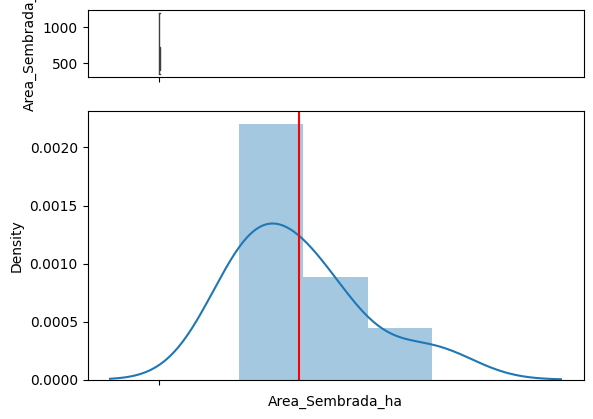

In [54]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(ENA['Area_Sembrada_ha'], ax=ax[0])
sns.distplot(ENA['Area_Sembrada_ha'], ax=ax[1])
ax[1].axvline(np.mean(ENA['Area_Sembrada_ha']), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/histo_cosechada.jpg")

/tmp/ipython-input-3986188751.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ENA['Rendimiento_ton_ha'], ax=ax[1])


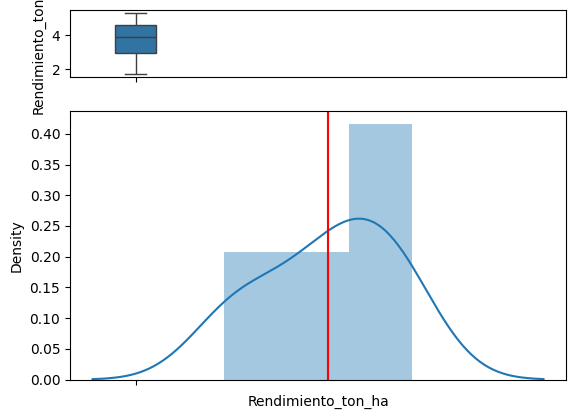

In [57]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(ENA['Rendimiento_ton_ha'], ax=ax[0])
sns.distplot(ENA['Rendimiento_ton_ha'], ax=ax[1])
ax[1].axvline(np.mean(ENA['Rendimiento_ton_ha']), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/histo_rendimiento.jpg")

['Departamento', 'Municipio', 'Cultivo', 'Area_Sembrada_ha', 'Area_Cosechada_ha', 'Produccion_ton', 'Rendimiento_ton_ha']


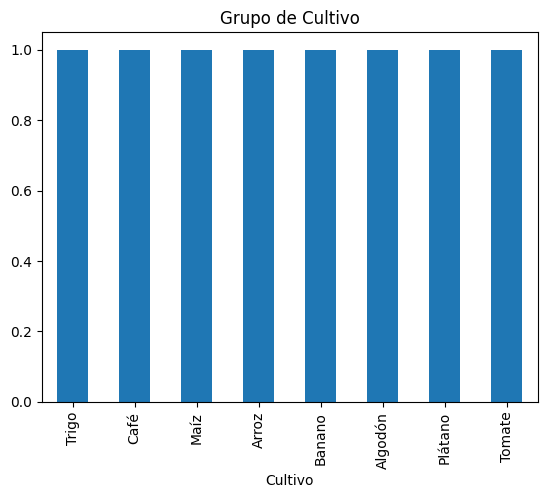

In [62]:
# Gráfico de barras de cultivos

print(ENA.columns.tolist())


plot = ENA['Cultivo'].value_counts().plot(kind='bar',
                                            title='Grupo de Cultivo')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/barras-grupocultivo.jpg")

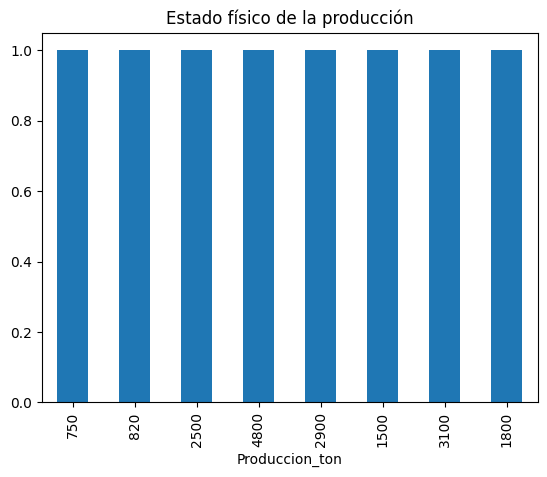

In [73]:
plot = ENA['Produccion_ton'].value_counts().plot(kind='bar',
                                            title='Estado físico de la producción')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/barras-estfisico.jpg")

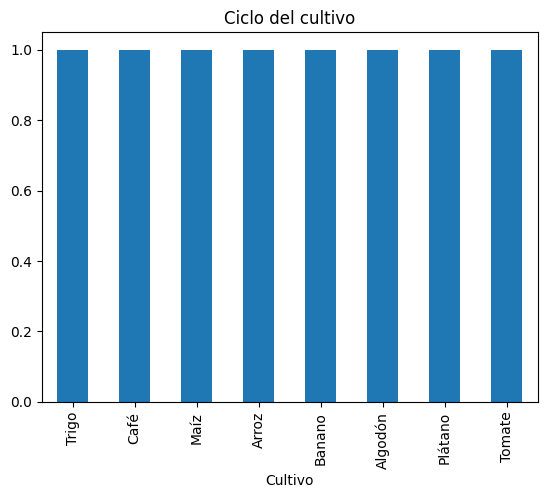

In [75]:
plot = ENA['Cultivo'].value_counts().plot(kind='bar',
                                            title='Ciclo del cultivo')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/ENA/barras-ciclo.jpg")

In [ ]:
ENA.info()

#EDÁFOLOGICOS

Analísis estadístico de las característticas físicas y químicas del suelo

In [90]:
#eliminar columnas que no son relevantes
Suelos=Data_Suelos.copy()
#Suelos=Data_Suelos.drop(['numfila','Secuencial','FechaAnalisis'], axis=1)

In [91]:
Suelos=Suelos.replace(to_replace='ND', value='', regex=True)
Suelos=Suelos.replace(to_replace='', value=np.nan)
Suelos=Suelos.replace(to_replace=r'MI', value='', regex=True)

In [92]:
Suelos=Suelos.astype({'pH agua:suelo 2,5:1,0':'float64'})
Suelos=Suelos.astype({'Materia orgánica (MO) %':'float64'})
Suelos=Suelos.astype({'Azufre (S) Fosfato monocalcico mg/kg':'float64'})
Suelos=Suelos.astype({'Acidez (Al+H) KCL cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Aluminio (Al) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Calcio (Ca) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Magnesio (Mg) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Potasio (K) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Sodio (Na) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m':'float64'})
Suelos=Suelos.astype({'Hierro (Fe) disponible olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Cobre (Cu) disponible mg/kg':'float64'})
Suelos=Suelos.astype({'Manganeso (Mn) disponible Olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Zinc (Zn) disponible Olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Boro (B) disponible mg/kg':'float64'})
Suelos=Suelos.astype({'Cobre (Cu) disponible doble acido mg/kg':'float64'})
Suelos=Suelos.astype({'Manganeso (Mn) disponible doble acido mg/kg':'float64'})

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'pH agua:suelo 2,5:1,0' not found in columns."

In [93]:
#Suelos=Suelos.astype({'Hierro (Fe) disponible doble  cido mg/kg':'float64'})
#Fósforo (P) Bray II mg/kg                                           46745 non-null  object
#Hierro (Fe) disponible doble  cido mg/kg                            2306 non-null   object
#Zinc (Zn) disponible doble  cido mg/kg                              2306 non-null   object

In [94]:
Suelos

,Departamento,Municipio,PH,N,P,K,Textura,Drenaje,Topografia
0,Nariño,Ipiales,6.5,45,80,120,Franco,Bueno,Plano
1,Cauca,Popayán,5.8,35,60,110,Arcilloso,Moderado,Ondulado
2,Tolima,Espinal,6.2,40,75,130,Arenoso,Bueno,Plano
3,Meta,Villavicencio,5.6,25,55,100,Franco-Arenoso,Excesivo,Plano
4,Antioquia,Medellín,6.8,50,85,140,Franco-Arcilloso,Bueno,Ondulado
5,Huila,Neiva,6.1,30,65,115,Arenoso,Deficiente,Plano
6,Santander,Bucaramanga,6.4,48,78,125,Franco,Bueno,Ondulado
7,Cundinamarca,Fusagasugá,6.6,42,70,120,Franco,Moderado,Plano


In [95]:
Suelos.mode()

,Departamento,Municipio,PH,N,P,K,Textura,Drenaje,Topografia
0,Antioquia,Bucaramanga,5.6,25,55,120.0,Franco,Bueno,Plano
1,Cauca,Espinal,5.8,30,60,NaN,NaN,NaN,NaN
2,Cundinamarca,Fusagasugá,6.1,35,65,NaN,NaN,NaN,NaN
3,Huila,Ipiales,6.2,40,70,NaN,NaN,NaN,NaN
4,Meta,Medellín,6.4,42,75,NaN,NaN,NaN,NaN
5,Nariño,Neiva,6.5,45,78,NaN,NaN,NaN,NaN
6,Santander,Popayán,6.6,48,80,NaN,NaN,NaN,NaN
7,Tolima,Villavicencio,6.8,50,85,NaN,NaN,NaN,NaN


In [97]:
# Seleccionar solo columnas numéricas
num_cols = Suelos.select_dtypes(include='number')

# Calcular la mediana solo de ellas
medianas = num_cols.median()
print(medianas)




#Suelos.median()

PH      6.3
N      41.0
P      72.5
K     120.0
dtype: float64


In [99]:
#Suelos.var()

# Seleccionar solo columnas numéricas
num_cols = Suelos.select_dtypes(include='number')

# Calcular la varianza solo de ellas
varianzas = num_cols.var()
print(varianzas)


PH      0.165714
N      77.125000
P     108.000000
K     150.000000
dtype: float64


In [101]:
#df1 = (Suelos
 # .groupby("Cultivo")
  #.agg(Frecuencia=("Cultivo", "count")))


  # Por ejemplo, con ENA
df1 = (ENA
       .groupby("Cultivo")
       .agg(Frecuencia=("Cultivo", "count")))

print(df1)


         Frecuencia
Cultivo            
Algodón           1
Arroz             1
Banano            1
Café              1
Maíz              1
Plátano           1
Tomate            1
Trigo             1


In [103]:
#df = Suelos[Suelos.Cultivo.isin(['Cacao','Pastos','Aguacate','Caña panelera/azucar', 'Café', 'Plátano','Arroz', 'Mora', 'Maíz'])]


df = ENA[ENA['Cultivo'].isin([
    'Cacao','Pastos','Aguacate','Caña panelera/azucar',
    'Café', 'Plátano','Arroz', 'Mora', 'Maíz'
])]


In [104]:
(df
  .groupby("Cultivo")
  .agg(Frecuencia=("Cultivo", "count")))

,Frecuencia
Cultivo,
Arroz,1
Café,1
Maíz,1
Plátano,1


In [106]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

#chart = histogram(_df_7, *['Frecuencia'], **{})
#chart

chart = histogram(df1, 'Frecuencia')
chart

In [108]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

#chart = value_plot(_df_6, *['Frecuencia'], **{})
#chart

chart = value_plot(df1, 'Frecuencia')
chart


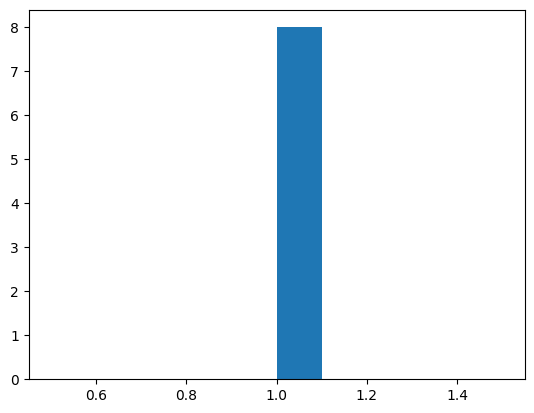

In [110]:
#fig, ax = plt.subplots()
#x = FR1['Frecuencia']
#ax.hist(x)
#plt.show()

fig, ax = plt.subplots()
x = df1['Frecuencia']
ax.hist(x)
plt.show()


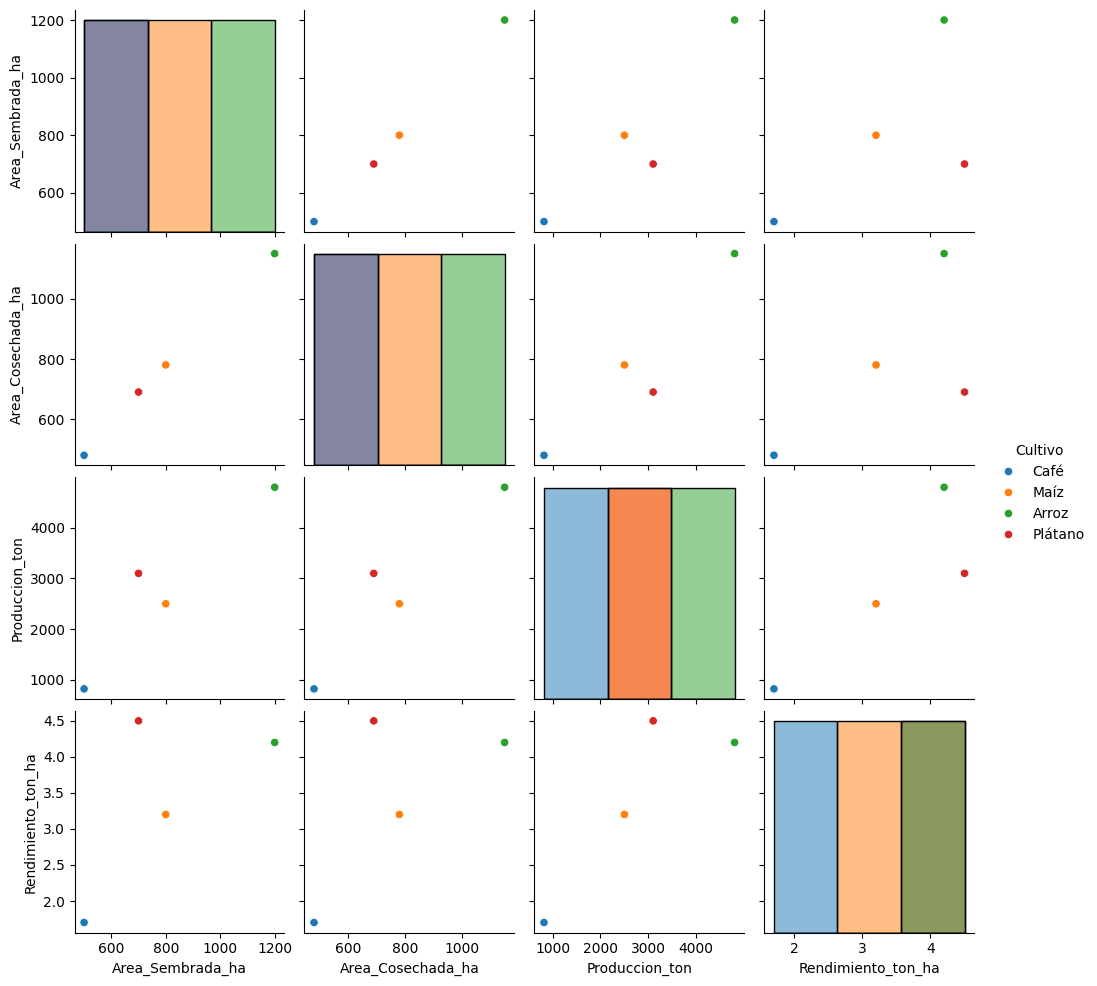

In [111]:
import seaborn as sns
# Ejemplo pairplot con datase iris
g = sns.pairplot(df, hue="Cultivo", diag_kind="hist")

In [114]:
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Datos procesados/Suelos/dispersion.jpg")

<Figure size 640x480 with 0 Axes>

Estadistica para variables nominales

In [116]:
#tabla de frecuencia
pd.value_counts(Data_Suelos['Departamento'])

/tmp/ipython-input-3619785072.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Data_Suelos['Departamento'])


,count
Departamento,
Nariño,1
Cauca,1
Tolima,1
Meta,1
Antioquia,1
Huila,1
Santander,1
Cundinamarca,1


Variable nominales

In [117]:
# tabla de frecuencia relativa de cultivo
100 * df['Cultivo'].value_counts() / len(df['Cultivo'])

,count
Cultivo,
Café,25.0
Maíz,25.0
Arroz,25.0
Plátano,25.0


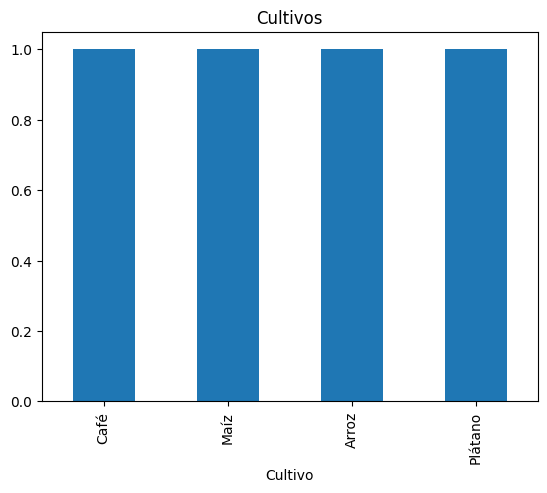

In [118]:
# Gráfico de barras de cultivos
plot = df['Cultivo'].value_counts().plot(kind='bar',
                                            title='Cultivos')

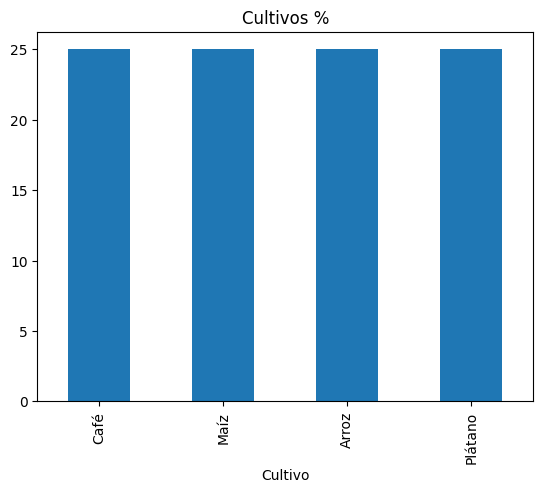

In [119]:
#gráfico de barras de frecuencias relativas.
plot = (100 *df['Cultivo'].value_counts() / len(df['Cultivo'])).plot(
kind='bar', title='Cultivos %')


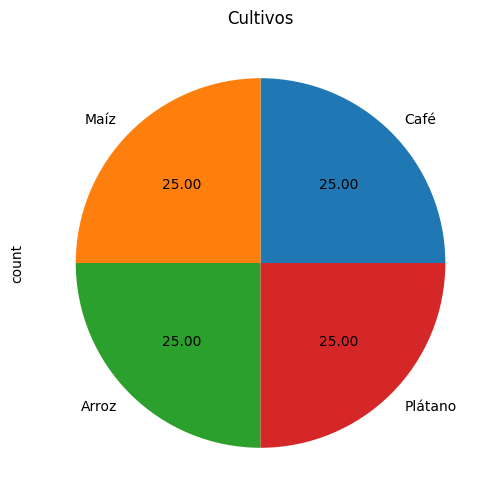

In [120]:
# Gráfico de tarta de pasajeros del Titanic
plot = df['Cultivo'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Cultivos')